In [248]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

%matplotlib inline

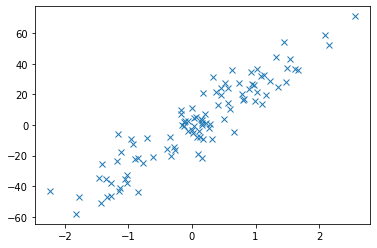

In [249]:
features = 1
samples = 100
x, y = datasets.make_regression(n_features=features, n_samples=samples, noise=10)
plt.plot(x, y, 'x')

# Gradient Descent

In [250]:
θ = (np.random.rand(features + 1) - 0.5) * 100
θ = θ.reshape(1, -1)
θ

array([[0.21522254, 2.56136821]])

error: 311.9548091161466


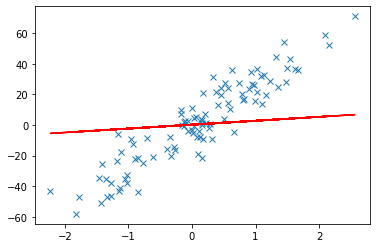

In [251]:
prerdictions = θ[:, 0] + θ[:,1:] @ x.T
prerdictions = prerdictions.reshape(-1)

error = 1/(2 * samples) * np.sum((prerdictions - y) ** 2)

plt.plot(x, y, 'x')
plt.plot(x, prerdictions, '-r')
print(f'error: {error}')

Error: 51.3441947223614


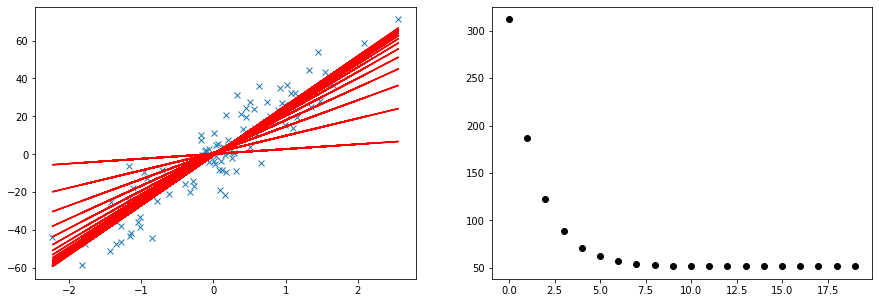

In [252]:
def gradient_decent(repeat, lr = 0.3):

    plt.figure(1, figsize=(15, 5))
    plt.subplot(121)
    plt.plot(x, y, 'x')
    for i in range(repeat):

        prerdictions = θ[:, 0] + θ[:,1:] @ x.T
        prerdictions = prerdictions.reshape(-1)

        error = 1/(2 * samples) * np.sum((prerdictions - y) ** 2)
        θ[:,0] -= lr/samples * np.sum(prerdictions - y)
        θ[:,1:] -= lr/samples * np.sum((prerdictions - y) @ x)

        plt.subplot(121)
        plt.plot(x, prerdictions, '-r')
        plt.subplot(122)
        plt.plot(i, error, 'ok')

    print(f'Error: {error}')
    plt.show()

gradient_decent(20)

# Normal Equation

$\theta = (X^TX)^{-1}X^TY$

In [253]:
rows, cols = x.shape

features = np.ones([rows, cols + 1])
features[:,1:] = x

θ = np.linalg.pinv(features.T @ features) @ features.T @ y
θ = θ.reshape(1, -1)
θ

array([[-0.72523203, 26.31221854]])

Error: 51.342109244953726


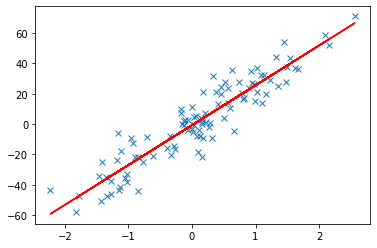

In [254]:
prerdictions = θ[:, 0] + θ[:,1:] @ x.T
prerdictions = prerdictions.reshape(-1)

error = 1/(2 * samples) * np.sum((prerdictions - y) ** 2)

print(f'Error: {error}')
plt.plot(x, y, 'x')
plt.plot(x, prerdictions, '-r')
plt.show()

## Normalize multivariable datset

In [297]:
data = np.loadtxt('./Files/ex1data2.txt', delimiter=',')
x = data[:, 1:]
y = data[:, -1]
samples, features = x.shape
print(f'''
    samples: {samples}
    features: {features}
''')


    samples: 47
    features: 2



In [298]:
θ = (np.random.rand(features + 1) - 0.5) * 100
θ = θ.reshape(-1, 1)
θ

array([[ 12.64590164],
       [-16.50293742],
       [ 27.85286778]])

In [299]:
x = np.concatenate((np.ones([samples, 1]), x), axis=1)
x.shape

(47, 3)

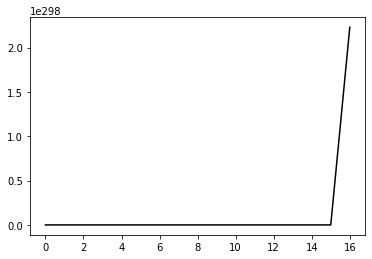

array([4.72961436e+013, 2.93024092e+031, 1.81543593e+049, 1.12475653e+067,
       6.96844893e+084, 4.31731483e+102, 2.67480002e+120, 1.65717707e+138,
       1.02670698e+156, 6.36098118e+173, 3.94095711e+191, 2.44162693e+209,
       1.51271427e+227, 9.37204795e+244, 5.80646884e+262, 3.59740801e+280,
       2.22878048e+298,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   nan,             nan,             nan,             nan])

In [300]:
iterations = 40
lr = 0.006
error_history = np.zeros(iterations)
for i in range(iterations):
    prerdictions = x @ θ
    prerdictions = prerdictions.reshape(-1)

    error = 1/(2 * samples) * np.sum((prerdictions - y) ** 2)
    error_history[i] = error

    θ -= lr/samples * np.sum((prerdictions - y) @ x)


plt.plot(range(iterations), error_history, '-k')
plt.show()
error_history

As we can see herer, due I haven't normalized the features we get some math errors and the error increrases

In [301]:
prerdictions

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan])

In [302]:
x = (x - x.mean(axis=0)) / x.std(axis=0)
x[:, 0] = 1

In [303]:
θ = (np.random.rand(features + 1) - 0.5) * 100
θ = θ.reshape(-1, 1)
θ

prerdictions = x @ θ
error = 1/(2 * samples) * np.sum((prerdictions - y) ** 2)
print(f'initial error for random θ is: {error}')

initial error for random θ is: 3083381423944.798


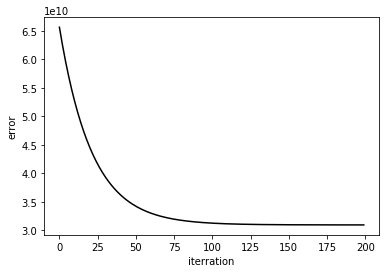

In [304]:
iterations = 200
lr = 0.006
error_history = np.zeros(iterations)
for i in range(iterations):
    predictions = x @ θ
    predictions = predictions.reshape(-1)

    error = 1/(2 * samples) * np.sum((predictions - y) ** 2)
    error_history[i] = error

    θ -= lr/samples * np.sum((predictions - y) @ x)

plt.plot(range(iterations), error_history, '-k')
plt.xlabel('iterration')
plt.ylabel('error')
plt.show()